Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Reading the dataset

In [2]:
df = pd.read_csv("/content/extended_rainfall_dataset.csv")

In [3]:
df.head()

Date  Temperature_C  Humidity_%  Pressure_hPa  Wind_Speed_m/s  \
0  2010-01-01      18.457896   78.120580   1002.525791        0.906626   
1  2010-01-02      22.068347   52.779280   1015.929910        7.232327   
2  2010-01-03      27.827849   36.631724   1020.404630       15.129677   
3  2010-01-04      38.268587   98.310960   1018.402886        7.378287   
4  2010-01-05      26.022787   50.038132    970.992367       14.303439   

   Cloud_Cover_%  Solar_Radiation_W/m^2  Soil_Moisture_%  Evaporation_mm/day  \
0      33.867192              19.289888         4.140286            2.337585   
1      70.645569             273.111361        44.203866            0.393047   
2      82.648394             545.878741        81.817965            2.759680   
3      34.627427             103.223117        93.400714            0.440993   
4       8.553536             640.870280        22.946792            0.475439   

   Rainfall_mm  
0    40.668750  
1    29.759819  
2    14.184440  
3    52.730006  
4     0.000000

In [4]:
df.drop('Date',axis=1,inplace=True)

In [5]:
df.head()

Temperature_C  Humidity_%  Pressure_hPa  Wind_Speed_m/s  Cloud_Cover_%  \
0      18.457896   78.120580   1002.525791        0.906626      33.867192   
1      22.068347   52.779280   1015.929910        7.232327      70.645569   
2      27.827849   36.631724   1020.404630       15.129677      82.648394   
3      38.268587   98.310960   1018.402886        7.378287      34.627427   
4      26.022787   50.038132    970.992367       14.303439       8.553536   

   Solar_Radiation_W/m^2  Soil_Moisture_%  Evaporation_mm/day  Rainfall_mm  
0              19.289888         4.140286            2.337585    40.668750  
1             273.111361        44.203866            0.393047    29.759819  
2             545.878741        81.817965            2.759680    14.184440  
3             103.223117        93.400714            0.440993    52.730006  
4             640.870280        22.946792            0.475439     0.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature_C          5113 non-null   float64
 1   Humidity_%             5113 non-null   float64
 2   Pressure_hPa           5113 non-null   float64
 3   Wind_Speed_m/s         5113 non-null   float64
 4   Cloud_Cover_%          5113 non-null   float64
 5   Solar_Radiation_W/m^2  5113 non-null   float64
 6   Soil_Moisture_%        5113 non-null   float64
 7   Evaporation_mm/day     5113 non-null   float64
 8   Rainfall_mm            5113 non-null   float64
dtypes: float64(9)
memory usage: 359.6 KB


In [7]:
df.describe()

Temperature_C   Humidity_%  Pressure_hPa  Wind_Speed_m/s  \
count    5113.000000  5113.000000   5113.000000     5113.000000   
mean       22.309224    64.709976   1000.132470       10.239643   
std        10.089712    20.071826     17.344052        5.794561   
min         5.000407    30.003698    970.015147        0.000962   
25%        13.632976    47.627029    985.034277        5.329339   
50%        22.086219    64.394436   1000.375104       10.308449   
75%        31.017351    82.033304   1015.271398       15.210680   
max        39.984520    99.977124   1029.995490       19.998020   

       Cloud_Cover_%  Solar_Radiation_W/m^2  Soil_Moisture_%  \
count    5113.000000            5113.000000      5113.000000   
mean       49.784404             396.918722        49.665009   
std        28.617387             229.801293        28.761849   
min         0.011023               0.053998         0.000554   
25%        25.194021             196.149143        24.728668   
50%        49.969292             395.666638        49.901783   
75%        73.852325             595.059816        74.392176   
max        99.959838             799.785667        99.978937   

       Evaporation_mm/day  Rainfall_mm  
count         5113.000000  5113.000000  
mean             2.504536    26.263153  
std              1.448399    15.541071  
min              0.000084     0.000000  
25%              1.263364    14.341309  
50%              2.499720    25.826822  
75%              3.774710    37.466401  
max              4.999453    71.251514

Finding the correlations between the features

In [8]:
core = df.corr()
core

Temperature_C  Humidity_%  Pressure_hPa  \
Temperature_C               1.000000   -0.023496      0.006718   
Humidity_%                 -0.023496    1.000000     -0.020146   
Pressure_hPa                0.006718   -0.020146      1.000000   
Wind_Speed_m/s              0.008859   -0.000825      0.025961   
Cloud_Cover_%               0.007697   -0.003413     -0.010653   
Solar_Radiation_W/m^2       0.020258    0.002562      0.004973   
Soil_Moisture_%            -0.007928    0.005103      0.023767   
Evaporation_mm/day          0.003739    0.022124     -0.001929   
Rainfall_mm                -0.274348    0.435641     -0.011530   

                       Wind_Speed_m/s  Cloud_Cover_%  Solar_Radiation_W/m^2  \
Temperature_C                0.008859       0.007697               0.020258   
Humidity_%                  -0.000825      -0.003413               0.002562   
Pressure_hPa                 0.025961      -0.010653               0.004973   
Wind_Speed_m/s               1.000000       0.005138              -0.014398   
Cloud_Cover_%                0.005138       1.000000               0.002598   
Solar_Radiation_W/m^2       -0.014398       0.002598               1.000000   
Soil_Moisture_%              0.010648      -0.002453               0.000925   
Evaporation_mm/day           0.007449       0.009646               0.000322   
Rainfall_mm                 -0.021280       0.253729              -0.714732   

                       Soil_Moisture_%  Evaporation_mm/day  Rainfall_mm  
Temperature_C                -0.007928            0.003739    -0.274348  
Humidity_%                    0.005103            0.022124     0.435641  
Pressure_hPa                  0.023767           -0.001929    -0.011530  
Wind_Speed_m/s                0.010648            0.007449    -0.021280  
Cloud_Cover_%                -0.002453            0.009646     0.253729  
Solar_Radiation_W/m^2         0.000925            0.000322    -0.714732  
Soil_Moisture_%               1.000000            0.032040     0.354816  
Evaporation_mm/day            0.032040            1.000000     0.009030  
Rainfall_mm                   0.354816            0.009030     1.000000

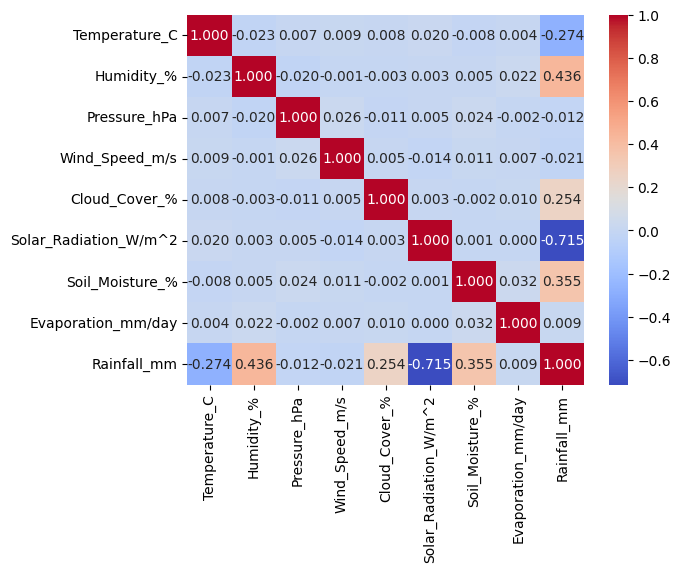

In [9]:
sns.heatmap(core,annot=True,cmap='coolwarm', fmt = ".3f")
plt.show()

In [10]:
df.columns

Index(['Temperature_C', 'Humidity_%', 'Pressure_hPa', 'Wind_Speed_m/s',
       'Cloud_Cover_%', 'Solar_Radiation_W/m^2', 'Soil_Moisture_%',
       'Evaporation_mm/day', 'Rainfall_mm'],
      dtype='object')

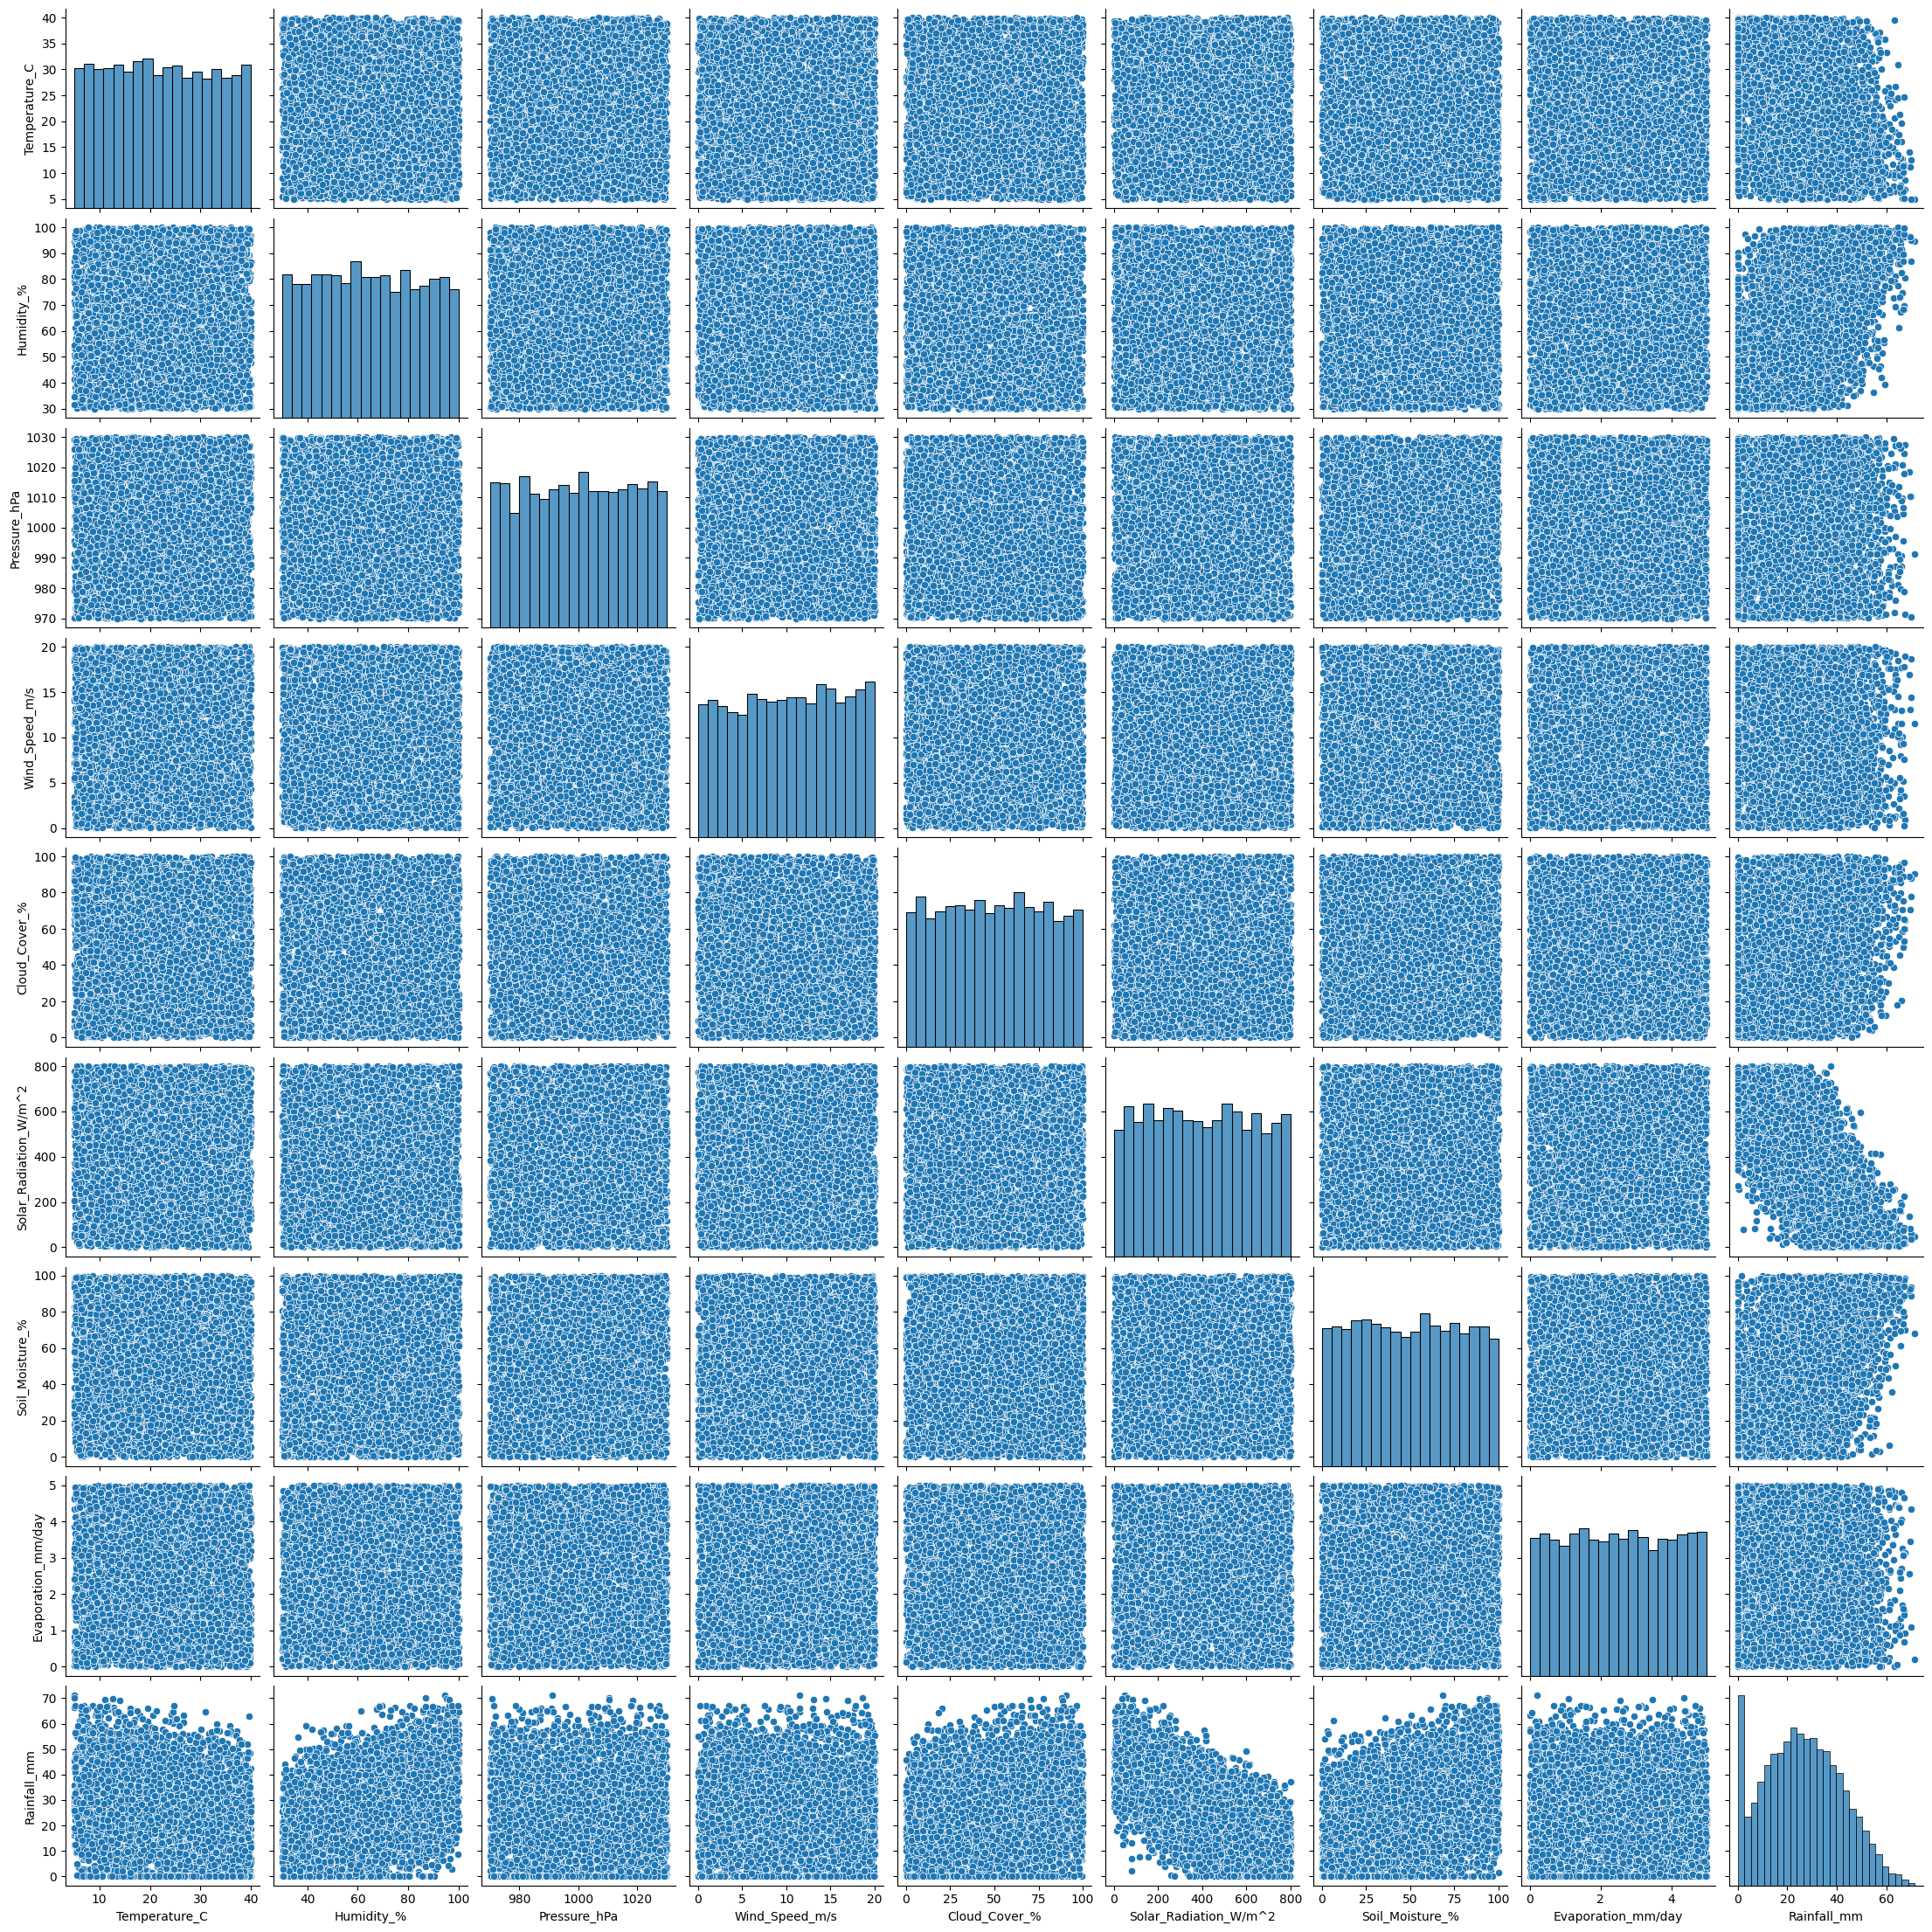

In [11]:
sns.pairplot(df)

Dropping unnecessary features

In [12]:
x = df.drop(['Rainfall_mm','Pressure_hPa','Wind_Speed_m/s','Evaporation_mm/day'],axis=1)
y = df['Rainfall_mm']

In [13]:
x


Temperature_C  Humidity_%  Cloud_Cover_%  Solar_Radiation_W/m^2  \
0         18.457896   78.120580      33.867192              19.289888   
1         22.068347   52.779280      70.645569             273.111361   
2         27.827849   36.631724      82.648394             545.878741   
3         38.268587   98.310960      34.627427             103.223117   
4         26.022787   50.038132       8.553536             640.870280   
...             ...         ...            ...                    ...   
5108       8.122776   53.513969      24.341243              21.783453   
5109      20.084407   39.396689      45.953227             586.687651   
5110      11.117535   35.192084      90.681060             627.052196   
5111      39.548503   99.452020      87.201876             560.343552   
5112      24.640257   75.891577      71.859982             570.956527   

      Soil_Moisture_%  
0            4.140286  
1           44.203866  
2           81.817965  
3           93.400714  
4           22.946792  
...               ...  
5108         2.062108  
5109        93.136127  
5110        25.207601  
5111        44.789919  
5112        95.057645  

[5113 rows x 5 columns]

In [14]:
y

0       40.668750
1       29.759819
2       14.184440
3       52.730006
4        0.000000
          ...    
5108    30.942590
5109    21.938338
5110    11.549648
5111    29.583276
5112    29.232481
Name: Rainfall_mm, Length: 5113, dtype: float64

In [15]:
x.columns

Index(['Temperature_C', 'Humidity_%', 'Cloud_Cover_%', 'Solar_Radiation_W/m^2',
       'Soil_Moisture_%'],
      dtype='object')

Checking the scale of the data


<Axes: >

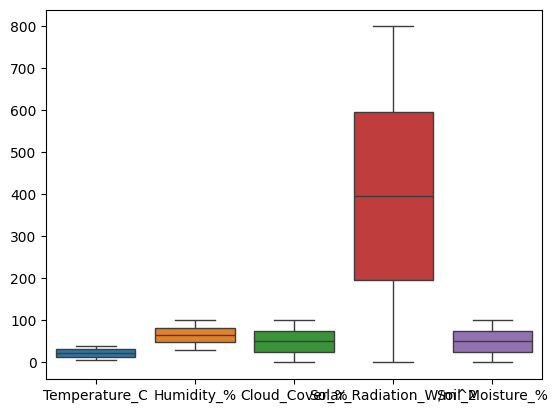

In [16]:
sns.boxplot(data=x)

Standardising the features to the same scale using MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
mms = MinMaxScaler()

In [19]:
x = mms.fit_transform(x)

In [20]:
x


array([[0.38467431, 0.68764508, 0.33873507, 0.02405293, 0.04140627],
       [0.4878769 , 0.32548902, 0.70670718, 0.34143623, 0.4421287 ],
       [0.65250882, 0.09472205, 0.8267969 , 0.68250985, 0.81835101],
       ...,
       [0.17485445, 0.07414795, 0.90716471, 0.78401071, 0.25212497],
       [0.98753673, 0.99249566, 0.87235504, 0.70059693, 0.4479905 ],
       [0.56139341, 0.65579008, 0.71885753, 0.7138676 , 0.95077644]])

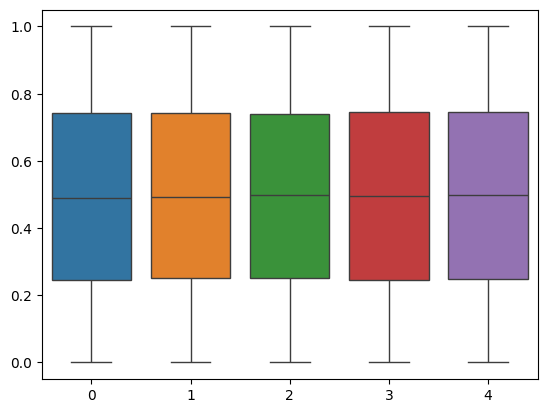

In [21]:
sns.boxplot(x)
plt.show()

Spliting the dataset using K-Fold and training the Linear Regression Model

In [22]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE,mean_absolute_error as MAE, r2_score as R2

In [23]:
kf = KFold(n_splits=5,shuffle=True)

In [24]:
mse = []
mae = []
r2 = []

In [25]:
for train_index,test_index in kf.split(x):
  x_train,x_test = x[train_index],x[test_index]
  y_train,y_test = y[train_index],y[test_index]
  model = LinearRegression()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  mse.append(MSE(y_test,y_pred))
  mae.append(MAE(y_test,y_pred))
  r2.append(R2(y_test,y_pred))
avg_mse = np.mean(mse)
avg_mae = np.mean(mae)
avg_r2 = np.mean(r2)
print("MSE: ",avg_mse)
print("MAE: ",avg_mae)
print("R2: ",avg_r2)

MSE:  10.771318537311528
MAE:  2.5586256600668187
R2:  0.955249464489355


Spliting the dataset using K-Fold and training the Support Vector Regression (SVR) Model

In [26]:
from sklearn.svm import SVR


Optimizing the value of the parameters of SVR

In [27]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
random_search = RandomizedSearchCV(estimator=SVR(), param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', verbose=1, random_state=42)
random_search.fit(x,y)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 1, 'C': 100}


In [28]:
SVRModel = SVR(kernel='rbf', C=100, epsilon=1, gamma='auto')

In [29]:
mse =[]
mae = []
r2 =[]

In [31]:
for train_index,test_index in kf.split(x):
  x_train,x_test = x[train_index],x[test_index]
  y_train,y_test = y[train_index],y[test_index]
  SVRModel.fit(x_train,y_train)
  y_pred = SVRModel.predict(x_test)
  mse.append(MSE(y_test,y_pred))
  mae.append(MAE(y_test,y_pred))
  r2.append(R2(y_test,y_pred))
avg_mse = np.mean(mse)
avg_mae = np.mean(mae)
avg_r2 = np.mean(r2)
print("MSE: ",avg_mse)
print("MAE: ",avg_mae)
print("R2: ",avg_r2)

MSE:  9.166773563582291
MAE:  2.421443482957734
R2:  0.9620196981848022
